# EDA Overview of Extracted Data From TMDB

* How many movies had at least some valid financial information (values > 0 for budget OR revenue)?


* How many movies are there in each of the certification categories (G/PG/PG-13/R)?


* What is the average revenue per certification category?


* What is the average budget per certification category

In [1]:
%load_ext autoreload
%autoreload 2
import functions as pf

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import os

import functions as pf

plt.style.use('fivethirtyeight')
sns.set_context('talk')

pd.set_option('display.max_columns',100)

In [3]:
FOLDER = "Data/"
sorted(os.listdir(FOLDER))

['combined_tmdb_api_data.csv.gz',
 'final_tmdb_data_2000.csv.gz',
 'final_tmdb_data_2001.csv.gz',
 'final_tmdb_data_2002.csv.gz',
 'final_tmdb_data_2003.csv.gz',
 'final_tmdb_data_2004.csv.gz',
 'final_tmdb_data_2005.csv.gz',
 'final_tmdb_data_2006.csv.gz',
 'final_tmdb_data_2007.csv.gz',
 'final_tmdb_data_2008.csv.gz',
 'final_tmdb_data_2009.csv.gz',
 'final_tmdb_data_2010.csv.gz',
 'final_tmdb_data_2011.csv.gz',
 'final_tmdb_data_2012.csv.gz',
 'final_tmdb_data_2013.csv.gz',
 'final_tmdb_data_2014.csv.gz',
 'final_tmdb_data_2015.csv.gz',
 'final_tmdb_data_2016.csv.gz',
 'final_tmdb_data_2017.csv.gz',
 'final_tmdb_data_2018.csv.gz',
 'final_tmdb_data_2019.csv.gz',
 'final_tmdb_data_2020.csv.gz',
 'final_tmdb_data_2021.csv.gz',
 'final_tmdb_data_2022.csv.gz',
 'title_akas_cleaned.csv.gz',
 'title_basics_cleaned.csv.gz',
 'title_ratings_cleaned.csv.gz']

In [4]:
import glob
q  = f"{FOLDER}final*.csv.gz"
files = sorted(glob.glob(q))
files

['Data\\final_tmdb_data_2000.csv.gz',
 'Data\\final_tmdb_data_2001.csv.gz',
 'Data\\final_tmdb_data_2002.csv.gz',
 'Data\\final_tmdb_data_2003.csv.gz',
 'Data\\final_tmdb_data_2004.csv.gz',
 'Data\\final_tmdb_data_2005.csv.gz',
 'Data\\final_tmdb_data_2006.csv.gz',
 'Data\\final_tmdb_data_2007.csv.gz',
 'Data\\final_tmdb_data_2008.csv.gz',
 'Data\\final_tmdb_data_2009.csv.gz',
 'Data\\final_tmdb_data_2010.csv.gz',
 'Data\\final_tmdb_data_2011.csv.gz',
 'Data\\final_tmdb_data_2012.csv.gz',
 'Data\\final_tmdb_data_2013.csv.gz',
 'Data\\final_tmdb_data_2014.csv.gz',
 'Data\\final_tmdb_data_2015.csv.gz',
 'Data\\final_tmdb_data_2016.csv.gz',
 'Data\\final_tmdb_data_2017.csv.gz',
 'Data\\final_tmdb_data_2018.csv.gz',
 'Data\\final_tmdb_data_2019.csv.gz',
 'Data\\final_tmdb_data_2020.csv.gz',
 'Data\\final_tmdb_data_2021.csv.gz',
 'Data\\final_tmdb_data_2022.csv.gz']

In [5]:
df = pd.concat([pd.read_csv(f) for f in files])
df

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,False,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127,tt0113026,en,The Fantasticks,Two rural teens sing and dance their way throu...,2.289,/hfO64mXz3DgUxkBVU7no2UWRP7x.jpg,"[{'id': 60, 'logo_path': '/2eqFolQI0NLL7ExZts5...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-22,0,86,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,False,5.500,22,NaN
1,False,NaN,NaN,0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977,tt0113092,en,For the Cause,Earth is in a state of constant war and two co...,3.133,/h9bWO13nWRGZJo4XVPiElXyrRMU.jpg,"[{'id': 925, 'logo_path': '/dIb9hjXNOkgxu4kBWd...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-11-15,0,100,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,False,5.100,8,NaN
2,False,NaN,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869,tt0116391,hi,Gang,"After falling prey to underworld, four friends...",1.091,/yB5wRu4uyXXwZA3PEj8cITu0xt3.jpg,[],"[{'iso_3166_1': 'IN', 'name': 'India'}]",2000-04-14,0,152,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,False,0.000,0,NaN
3,False,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843,tt0118694,cn,花樣年華,"Hong Kong, 1962: Chow Mo-Wan and Su Li-Zhen mo...",22.892,/iYypPT4bhqXfq1b6EnmxvRt6b2Y.jpg,"[{'id': 539, 'logo_path': None, 'name': 'Block...","[{'iso_3166_1': 'HK', 'name': 'Hong Kong'}]",2000-09-29,12854953,99,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,False,8.103,1948,PG
4,False,NaN,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,49511,tt0118852,en,Chinese Coffee,"When Harry Levine, an aging, unsuccessful Gree...",3.913,/nZGWnSuf1FIuzyEuMRZHHZWViAp.jpg,"[{'id': 1596, 'logo_path': None, 'name': 'Shoo...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-02,0,99,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,There's a fine line between friendship and bet...,Chinese Coffee,False,6.900,46,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1675,False,/8tyq1kXM3YQmu3obW6LxWm5TVRO.jpg,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 36, 'nam...",NaN,605153,tt9851854,te,మేజర్,Based on the life of real-life Hero Major Sand...,19.029,/sJOfJuyQVZPwNQ8g21Qv0lojQhC.jpg,"[{'id': 69124, 'logo_path': None, 'name': 'G. ...","[{'iso_3166_1': 'IN', 'name': 'India'}]",2022-06-03,0,149,"[{'english_name': 'Telugu', 'iso_639_1': 'te',...",Released,Jaan Doonga Desh Nahi,Major,False,8.233,15,NaN
1676,False,NaN,NaN,0,"[{'id': 80, 'name': 'Crime'}]",NaN,969840,tt9854058,en,Shadows,A young low-level drug dealer is reunited with...,0.600,/2HaAOGM1EmiSwsJrdq1RNhYehce.jpg,[],[],2022-05-13,0,101,[],Released,Family Is The Last Line Of Defense,Shadows,False,0.000,0,NaN
1677,False,NaN,NaN,0,"[{'id': 80, 'name': 'Crime'}, {'id': 10749, 'n...",NaN,796955,tt9893158,en,Clowning,"With his girlfriend pregnant, Dante, a pacifis...",3.136,/xppIANX9DQoRYg3FlNCifDYuFwP.jpg,"[{'id': 109533, 'logo_path': '/xtQJYJg54jp5QVS...","[{'iso_3166_1': 'US', 'name': 'United States o...",2022-03-13,0,96,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Warm nights... Feels like death in the sand du...,Clowning,False,8.000,1,NaN
1678,False,/jX5XGqJUTzvpta2RjcX6pMZqxk5.jpg,NaN,0,"[{'id': 53, 'name': 'Thriller'}, {'id': 80, 'n...",NaN,606303,tt9893160,en,No Way Out,"Nick, a talented photographer who is n

In [6]:
# dropping placeholder imdb IDs of 0
df = df.loc[df['imdb_id']!='0']
df

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,False,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127,tt0113026,en,The Fantasticks,Two rural teens sing and dance their way throu...,2.289,/hfO64mXz3DgUxkBVU7no2UWRP7x.jpg,"[{'id': 60, 'logo_path': '/2eqFolQI0NLL7ExZts5...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-22,0,86,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,False,5.500,22,NaN
1,False,NaN,NaN,0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977,tt0113092,en,For the Cause,Earth is in a state of constant war and two co...,3.133,/h9bWO13nWRGZJo4XVPiElXyrRMU.jpg,"[{'id': 925, 'logo_path': '/dIb9hjXNOkgxu4kBWd...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-11-15,0,100,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,False,5.100,8,NaN
2,False,NaN,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869,tt0116391,hi,Gang,"After falling prey to underworld, four friends...",1.091,/yB5wRu4uyXXwZA3PEj8cITu0xt3.jpg,[],"[{'iso_3166_1': 'IN', 'name': 'India'}]",2000-04-14,0,152,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,False,0.000,0,NaN
3,False,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843,tt0118694,cn,花樣年華,"Hong Kong, 1962: Chow Mo-Wan and Su Li-Zhen mo...",22.892,/iYypPT4bhqXfq1b6EnmxvRt6b2Y.jpg,"[{'id': 539, 'logo_path': None, 'name': 'Block...","[{'iso_3166_1': 'HK', 'name': 'Hong Kong'}]",2000-09-29,12854953,99,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,False,8.103,1948,PG
4,False,NaN,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,49511,tt0118852,en,Chinese Coffee,"When Harry Levine, an aging, unsuccessful Gree...",3.913,/nZGWnSuf1FIuzyEuMRZHHZWViAp.jpg,"[{'id': 1596, 'logo_path': None, 'name': 'Shoo...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-02,0,99,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,There's a fine line between friendship and bet...,Chinese Coffee,False,6.900,46,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1675,False,/8tyq1kXM3YQmu3obW6LxWm5TVRO.jpg,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 36, 'nam...",NaN,605153,tt9851854,te,మేజర్,Based on the life of real-life Hero Major Sand...,19.029,/sJOfJuyQVZPwNQ8g21Qv0lojQhC.jpg,"[{'id': 69124, 'logo_path': None, 'name': 'G. ...","[{'iso_3166_1': 'IN', 'name': 'India'}]",2022-06-03,0,149,"[{'english_name': 'Telugu', 'iso_639_1': 'te',...",Released,Jaan Doonga Desh Nahi,Major,False,8.233,15,NaN
1676,False,NaN,NaN,0,"[{'id': 80, 'name': 'Crime'}]",NaN,969840,tt9854058,en,Shadows,A young low-level drug dealer is reunited with...,0.600,/2HaAOGM1EmiSwsJrdq1RNhYehce.jpg,[],[],2022-05-13,0,101,[],Released,Family Is The Last Line Of Defense,Shadows,False,0.000,0,NaN
1677,False,NaN,NaN,0,"[{'id': 80, 'name': 'Crime'}, {'id': 10749, 'n...",NaN,796955,tt9893158,en,Clowning,"With his girlfriend pregnant, Dante, a pacifis...",3.136,/xppIANX9DQoRYg3FlNCifDYuFwP.jpg,"[{'id': 109533, 'logo_path': '/xtQJYJg54jp5QVS...","[{'iso_3166_1': 'US', 'name': 'United States o...",2022-03-13,0,96,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Warm nights... Feels like death in the sand du...,Clowning,False,8.000,1,NaN
1678,False,/jX5XGqJUTzvpta2RjcX6pMZqxk5.jpg,NaN,0,"[{'id': 53, 'name': 'Thriller'}, {'id': 80, 'n...",NaN,606303,tt9893160,en,No Way Out,"Nick, a talented photographer who is n

In [7]:
# Adding release year
df['Release Year'] = df['release_date'].apply(lambda x: float(str(x).split('-')[0]))
df

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification,Release Year
0,False,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127,tt0113026,en,The Fantasticks,Two rural teens sing and dance their way throu...,2.289,/hfO64mXz3DgUxkBVU7no2UWRP7x.jpg,"[{'id': 60, 'logo_path': '/2eqFolQI0NLL7ExZts5...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-22,0,86,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,False,5.500,22,NaN,2000.0
1,False,NaN,NaN,0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977,tt0113092,en,For the Cause,Earth is in a state of constant war and two co...,3.133,/h9bWO13nWRGZJo4XVPiElXyrRMU.jpg,"[{'id': 925, 'logo_path': '/dIb9hjXNOkgxu4kBWd...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-11-15,0,100,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,False,5.100,8,NaN,2000.0
2,False,NaN,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869,tt0116391,hi,Gang,"After falling prey to underworld, four friends...",1.091,/yB5wRu4uyXXwZA3PEj8cITu0xt3.jpg,[],"[{'iso_3166_1': 'IN', 'name': 'India'}]",2000-04-14,0,152,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,False,0.000,0,NaN,2000.0
3,False,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843,tt0118694,cn,花樣年華,"Hong Kong, 1962: Chow Mo-Wan and Su Li-Zhen mo...",22.892,/iYypPT4bhqXfq1b6EnmxvRt6b2Y.jpg,"[{'id': 539, 'logo_path': None, 'name': 'Block...","[{'iso_3166_1': 'HK', 'name': 'Hong Kong'}]",2000-09-29,12854953,99,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,False,8.103,1948,PG,2000.0
4,False,NaN,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,49511,tt0118852,en,Chinese Coffee,"When Harry Levine, an aging, unsuccessful Gree...",3.913,/nZGWnSuf1FIuzyEuMRZHHZWViAp.jpg,"[{'id': 1596, 'logo_path': None, 'name': 'Shoo...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-02,0,99,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,There's a fine line between friendship and bet...,Chinese Coffee,False,6.900,46,R,2000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1675,False,/8tyq1kXM3YQmu3obW6LxWm5TVRO.jpg,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 36, 'nam...",NaN,605153,tt9851854,te,మేజర్,Based on the life of real-life Hero Major Sand...,19.029,/sJOfJuyQVZPwNQ8g21Qv0lojQhC.jpg,"[{'id': 69124, 'logo_path': None, 'name': 'G. ...","[{'iso_3166_1': 'IN', 'name': 'India'}]",2022-06-03,0,149,"[{'english_name': 'Telugu', 'iso_639_1': 'te',...",Released,Jaan Doonga Desh Nahi,Major,False,8.233,15,NaN,2022.0
1676,False,NaN,NaN,0,"[{'id': 80, 'name': 'Crime'}]",NaN,969840,tt9854058,en,Shadows,A young low-level drug dealer is reunited with...,0.600,/2HaAOGM1EmiSwsJrdq1RNhYehce.jpg,[],[],2022-05-13,0,101,[],Released,Family Is The Last Line Of Defense,Shadows,False,0.000,0,NaN,2022.0
1677,False,NaN,NaN,0,"[{'id': 80, 'name': 'Crime'}, {'id': 10749, 'n...",NaN,796955,tt9893158,en,Clowning,"With his girlfriend pregnant, Dante, a pacifis...",3.136,/xppIANX9DQoRYg3FlNCifDYuFwP.jpg,"[{'id': 109533, 'logo_path': '/xtQJYJg54jp5QVS...","[{'iso_3166_1': 'US', 'name': 'United States o...",2022-03-13,0,96,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Warm nights... Feels like death in the sand du...,Clowning,False,8.000,1,NaN,2022.0
1678,False,/jX5XGqJUTzvpta2RjcX6pMZqxk5.jpg,NaN,0,"[{'id': 53, 'name': 'Thriller'}, {'id': 80, 'n...",N

In [8]:
fname =FOLDER+'combined_tmdb_api_data.csv.gz'
df.to_csv(fname,compression='gzip',index=False)
df = pd.read_csv(fname)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62384 entries, 0 to 62383
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  62384 non-null  bool   
 1   backdrop_path          39108 non-null  object 
 2   belongs_to_collection  3980 non-null   object 
 3   budget                 62384 non-null  int64  
 4   genres                 62384 non-null  object 
 5   homepage               15351 non-null  object 
 6   id                     62384 non-null  int64  
 7   imdb_id                62384 non-null  object 
 8   original_language      62384 non-null  object 
 9   original_title         62384 non-null  object 
 10  overview               61003 non-null  object 
 11  popularity             62384 non-null  float64
 12  poster_path            56816 non-null  object 
 13  production_companies   62384 non-null  object 
 14  production_countries   62384 non-null  object 
 15  re

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification,Release Year
0,False,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127,tt0113026,en,The Fantasticks,Two rural teens sing and dance their way throu...,2.289,/hfO64mXz3DgUxkBVU7no2UWRP7x.jpg,"[{'id': 60, 'logo_path': '/2eqFolQI0NLL7ExZts5...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-22,0,86,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,False,5.500,22,NaN,2000.0
1,False,NaN,NaN,0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977,tt0113092,en,For the Cause,Earth is in a state of constant war and two co...,3.133,/h9bWO13nWRGZJo4XVPiElXyrRMU.jpg,"[{'id': 925, 'logo_path': '/dIb9hjXNOkgxu4kBWd...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-11-15,0,100,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,False,5.100,8,NaN,2000.0
2,False,NaN,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869,tt0116391,hi,Gang,"After falling prey to underworld, four friends...",1.091,/yB5wRu4uyXXwZA3PEj8cITu0xt3.jpg,[],"[{'iso_3166_1': 'IN', 'name': 'India'}]",2000-04-14,0,152,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,False,0.000,0,NaN,2000.0
3,False,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843,tt0118694,cn,花樣年華,"Hong Kong, 1962: Chow Mo-Wan and Su Li-Zhen mo...",22.892,/iYypPT4bhqXfq1b6EnmxvRt6b2Y.jpg,"[{'id': 539, 'logo_path': None, 'name': 'Block...","[{'iso_3166_1': 'HK', 'name': 'Hong Kong'}]",2000-09-29,12854953,99,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,False,8.103,1948,PG,2000.0
4,False,NaN,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,49511,tt0118852,en,Chinese Coffee,"When Harry Levine, an aging, unsuccessful Gree...",3.913,/nZGWnSuf1FIuzyEuMRZHHZWViAp.jpg,"[{'id': 1596, 'logo_path': None, 'name': 'Shoo...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-02,0,99,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,There's a fine line between friendship and bet...,Chinese Coffee,False,6.900,46,R,2000.0


# How many movies had at least some valid financial information? 

In [9]:
## save separeate filters for movie with budget/revenue >0 
filter_budget = df['budget'] > 0
filter_revenue = df['revenue']>0


## print value counts of filters
print('- Movies with >0 for budget:')
display(filter_budget.value_counts())

print('- Movies with >0 for revenue:')
display(filter_revenue.value_counts())

- Movies with >0 for budget:


False    50987
True     11397
Name: budget, dtype: int64

- Movies with >0 for revenue:


False    54698
True      7686
Name: revenue, dtype: int64

In [10]:
## compare using and vs or for filtering financials 
filter_and = filter_budget & filter_revenue
print('- If use AND for final filter:')
display(filter_and.value_counts())

filter_or = filter_budget | filter_revenue
print('- If use OR for final filter:')
display(filter_or.value_counts())

- If use AND for final filter:


False    57173
True      5211
dtype: int64

- If use OR for final filter:


False    48512
True     13872
dtype: int64

In [11]:
## Using filter_or
filter_financial = filter_and
filter_financial.value_counts()

False    57173
True      5211
dtype: int64

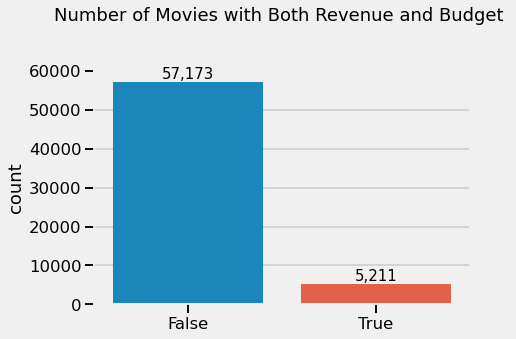

In [12]:
ax = sns.countplot(x=filter_and)
ax.set_title('Number of Movies with Both Revenue and Budget \n',y=1.1)
pf.annotate_bars(ax,fmt=",");

# What Years are represented?

In [13]:
plot_df = df[filter_financial].copy()
years = sorted(plot_df['Release Year'].dropna().astype(int).unique())
years

[2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022]

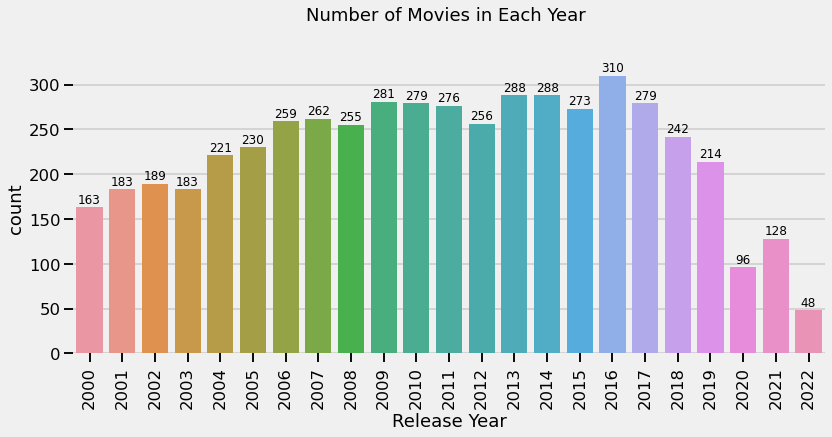

In [14]:
plt.figure(figsize=(12,5))
ax = sns.countplot(data=plot_df, x='Release Year', order =years );
ax.set_title('Number of Movies in Each Year \n',y=1.05)
pf.annotate_bars(ax, fmt=',',size=12,convert_millions=False,despine=True,
                 spines=['left','right','bottom'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax;

## Average Revenue By Year

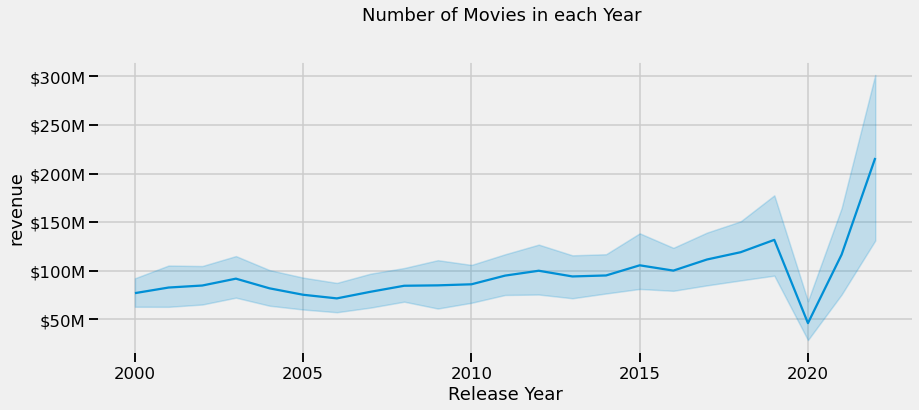

In [15]:
mill = pf.get_funcformatter(kind='m', prefix='$', float_fmt=',.0f')

plt.figure(figsize=(13,5))
ax = sns.lineplot(data=plot_df, x='Release Year', y='revenue')
ax.set_title('Number of Movies in each Year \n', y=1.05)
pf.annotate_bars(ax, fmt=',', size=12, convert_millions=False, despine=True,
                  spines=['left', 'right', 'bottom'])

ax.yaxis.set_major_formatter(mill)

# How many movies are there in each of the certification categories (G/PG/PG-13/R)?

In [16]:
df['certification'].value_counts()

R                                  6318
NR                                 3386
PG-13                              3331
PG                                 1479
G                                   452
NC-17                               162
Unrated                               5
-                                     1
UR                                    1
Not Rated                             1
ScreamFest Horror Film Festival       1
R                                     1
PG-13                                 1
10                                    1
Name: certification, dtype: int64

In [17]:
## fixing inconsitent certifications


# fix extra space certs
df['certification'] = df['certification'].str.strip()

## fix certification col
repl_cert = {'UR':'NR',
             'Not Rated':'NR',
             'Unrated':'NR',
             '-':'NR',
             '10':np.nan,
             'ScreamFest Horror Film Festival':'NR'}

df['certification'] = df['certification'].replace(repl_cert)
df['certification'].value_counts(dropna=False)

NaN      47245
R         6319
NR        3395
PG-13     3332
PG        1479
G          452
NC-17      162
Name: certification, dtype: int64

In [18]:
cert_order = ['G','PG','PG-13','R','NC-17','NR']

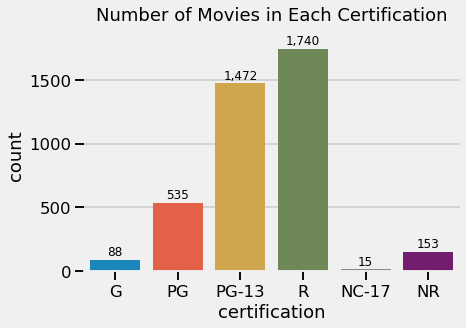

In [19]:
ax = sns.countplot(data=plot_df, x='certification',order=cert_order);
ax.set_title('Number of Movies in Each Certification',y=1.05)
pf.annotate_bars(ax,fmt=',',size=12,convert_millions=False,despine=True,
                 spines=['left','right','bottom'])
sns.despine(ax.get_figure(),left=True);